### Random Forrest on the Dataset

Pre-processing data:

In [11]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

data_path = 'E:/Datasets/CSE445 Dataset/10k_songs_analysed.csv'
df = pd.read_csv(data_path)
df = df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'year', 'genre', 'mode', 'popularity', 'duration_ms', 'time_signature'])

X = df[['energy', 'valence', 'acousticness', 'tempo', 'loudness']]
y = df['Mood']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)



Building and Training Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Score:  0.9995


__Confusion Matrix of the Random Forest__ (using the Test Split 20% of the dataset)

Confusion Matrix:
[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]


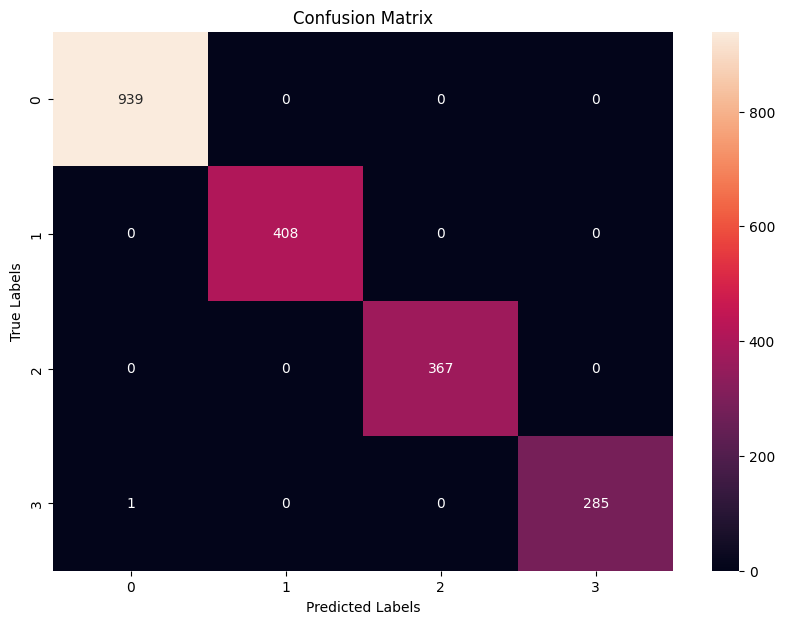

Accuracy Score: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

GridSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

grid_predictions = best_grid.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))
print("Best Parameters:\n", grid_search.best_params_)
print("Best Grid Accuracy:\n", accuracy_score(y_test, grid_predictions))


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Confusion Matrix:
 [[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Best Parameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best Grid Accuracy:
 0.9995


RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 1100, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_
predictions = best_rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  1   0   0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Bayesian Optimization:

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 500, 800, 1200]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40, 50]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 4, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

def objective(params):
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])
    
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

best_params = {
    'n_estimators': [100, 200, 300, 500, 800, 1200][best['n_estimators']],
    'max_depth': [None, 10, 20, 30, 40, 50][best['max_depth']],
    'max_features': ['sqrt', 'log2', None][best['max_features']],
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]
}

print("Best Hyperparameters:", best_params)

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


100%|██████████| 100/100 [30:33<00:00, 18.34s/trial, best loss: -0.99975]
Best Hyperparameters: {'n_estimators': 500, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 4, 'criterion': 'entropy'}
Confusion Matrix:
[[939   0   0   0]
 [  0 408   0   0]
 [  0   0 367   0]
 [  0   0   0 286]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       286

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Score: 1.0
